## Regression and Classifications - Cross Validation


In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes


In [2]:
diabetes=load_diabetes()
X=diabetes.data
y=diabetes.target

In [4]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
X_train, X_test, y_train, y_test =train_test_split (X,y, test_size=0.2, random_state=42)

In [9]:
regressor=DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train )
y_pred=regressor.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
r2= r2_score(y_test,y_pred)
print(f"MSE: {mse}")
print(f"R2 Score {r2}")

MSE: 4976.797752808989
R2 Score 0.060653981041140725


## MODELO DE CLASIFICACIÓN 

In [11]:
from sklearn.datasets import load_iris


In [15]:
X, y = load_iris(return_X_y=True)
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split (X,y, test_size=0.20)

In [19]:
model=DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9333333333333333

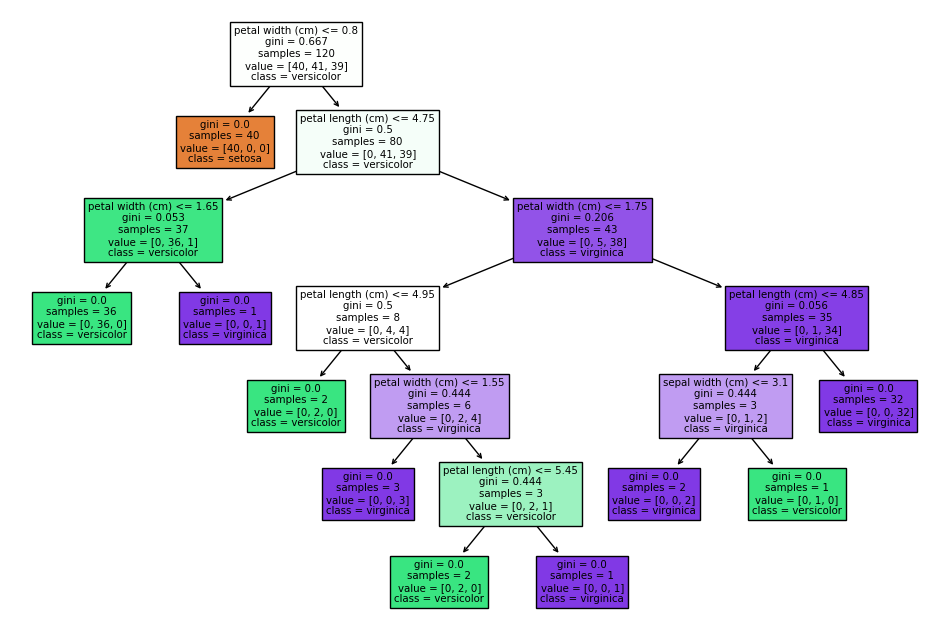

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


## CROSS VALIDATION 

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV



In [34]:
#Creas un clasificador de árbol de decisión
tree_classifier = DecisionTreeClassifier()

#Defines un rango de valores para los hiperparámetros que elijas
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(tree_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

#MEJORES PARÁMETROS
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

#Training training
best_tree_classifier = DecisionTreeClassifier(**best_params) # ,random=42)
best_tree_classifier.fit(X_train, y_train)

Mejores hiperparámetros: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 5}


DecisionTreeClassifier(max_features='log2', min_samples_leaf=10,
                       min_samples_split=5)

In [35]:
best_tree_classifier.score(X_test, y_test)

0.9666666666666667